In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv2_imshow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

# Zadanie 2. Przestrzenie barw.

1. Wczytać kolorowy obraz.
2. Wyświetlić osobno każdą warstwę - R, G, B.
3. Zamienić obraz na skalę szarości przy wykorzystaniu wbudowanej metody (GRAY).
4. Zamienić obraz na RGB (z BGR) przy wykorzystaniu wbudowanej metody.
5. Zamienic obraz na przestrzeń barw HSV. Wyświetlić każdą warstwę osobno. Spróbować zobaczyć różnice z RGB.
6. *Wyświetlić tylko zielone fragmenty zdjęcia.

In [3]:
# wczytanie obrazu
img = cv2.imread('ML-datasets/images/gory_lc.png')
img = cv2.imread('data/IMG_1671.jpg')


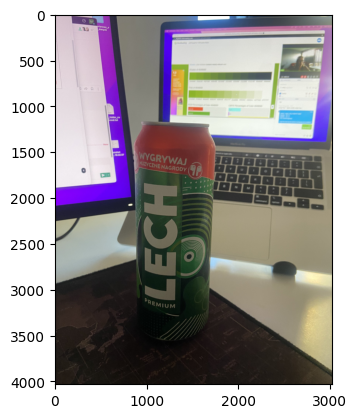

In [4]:
cv2_imshow(img)

In [5]:
# BGR
image_red = img[:,:,2]
image_blue = img[:,:,0]
image_green = img[:,:,1]

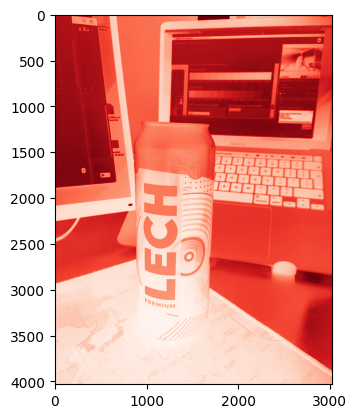

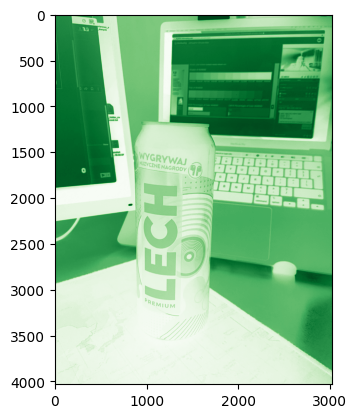

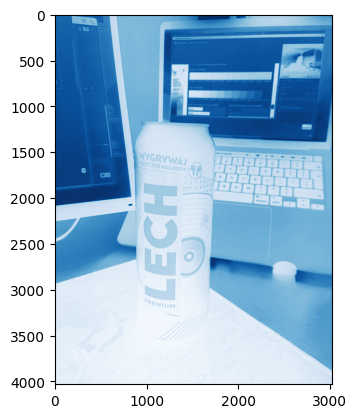

In [6]:
import matplotlib.pyplot as plt

plt.imshow(image_red, cmap='Reds')
plt.show()
plt.imshow(image_green, cmap='Greens')
plt.show()
plt.imshow(image_blue, cmap='Blues')
plt.show()

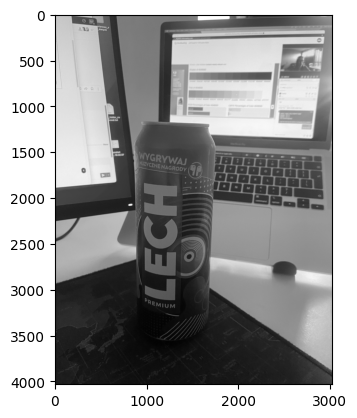

In [7]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey)

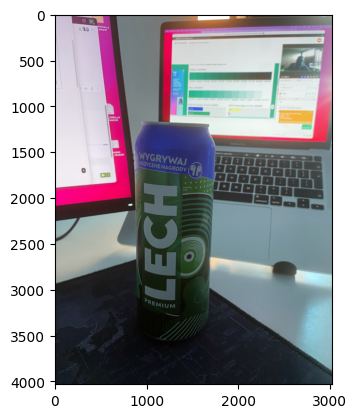

In [8]:
image_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(image_plt)

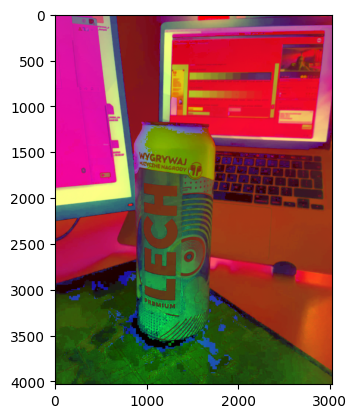

In [9]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(image_hsv)

In [10]:
image_hue = image_hsv[:,:,0]
image_saturation = image_hsv[:,:,1]
image_value = image_hsv[:,:,2]

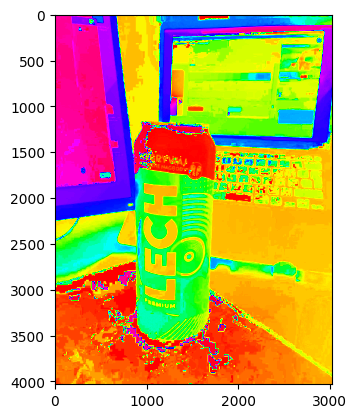

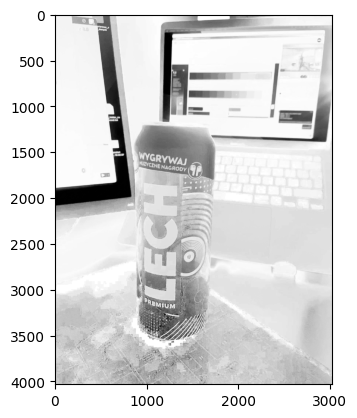

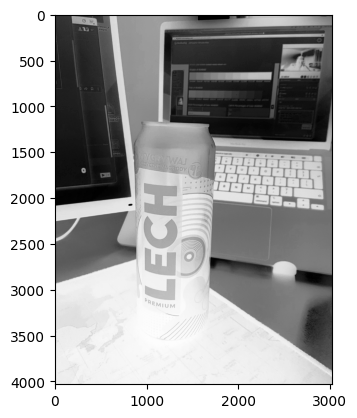

In [11]:
import matplotlib.pyplot as plt

plt.imshow(image_hue, cmap='hsv')
plt.show()
plt.imshow(image_saturation, cmap='Greys')
plt.show()
plt.imshow(image_value, cmap='Greys')
plt.show()

In [12]:
image_hue.max(), image_hue.min(), image_hue.mean()

(179, 0, 57.58953914320358)

In [13]:
image_saturation.max(), image_saturation.min(), image_saturation.mean()

(255, 0, 64.47077915367537)

In [14]:
image_value.max(), image_value.min(), image_value.mean()

(255, 0, 131.2141826203861)

In [15]:
# szukamy wartości zielonego w HSV (przede wszystim HUE)
# https://docs.opencv.org/3.4/df/d9d/tutorial_py_colorspaces.html
green = np.uint8([[[0,255,0 ]]])  # BGR
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green[0][0])
green_value = hsv_green[0][0][0]  # tylko pierwsza wartość - HUE

[ 60 255 255]


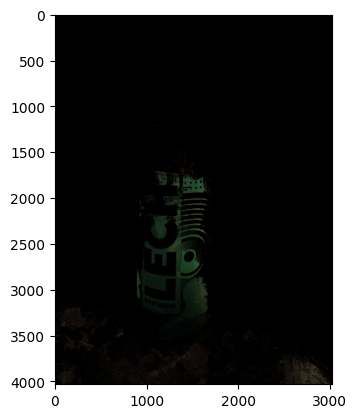

In [83]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('data/IMG_1671.jpg')

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of green color in HSV
lower_green = np.array([0, 95, 0])  # Adjust the values according to your needs
upper_green = np.array([80, 200, 80])  # Adjust the values according to your needs

# Threshold the HSV image to get only green colors
mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask=mask)

# Display the result
cv2_imshow(res)

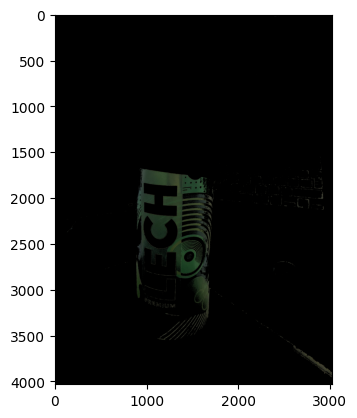

In [85]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('data/IMG_1671.jpg')

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of green color in HSV
lower_green = np.array([25, 40, 40])  # Adjust the values according to your needs
upper_green = np.array([100, 255, 255])  # Adjust the values according to your needs

# Create a mask for green color
green_mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Apply additional filtering to exclude white and gray colors
gray_threshold = 80  # Adjust the threshold value for gray detection

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a mask for white color
white_mask = cv2.threshold(gray_img, gray_threshold, 255, cv2.THRESH_BINARY_INV)[1]

# Combine the masks to exclude white and gray colors
final_mask = cv2.bitwise_and(green_mask, white_mask)

# Apply the final mask to the original image
res = cv2.bitwise_and(img, img, mask=final_mask)

# Display the result
cv2_imshow(res)

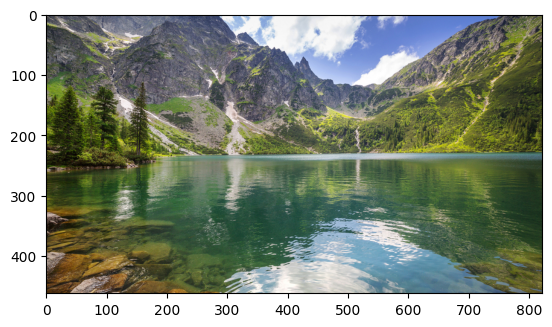

In [18]:
cv2_imshow(img)

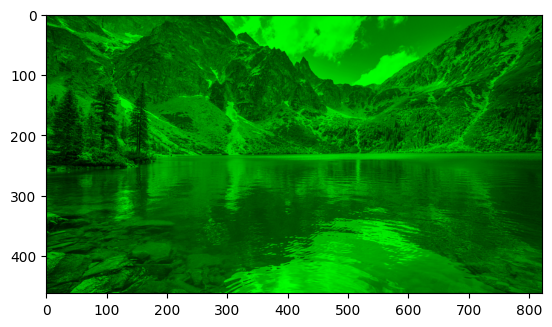

In [19]:
green = img.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0
cv2_imshow(green)